In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [8]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
df.info()
print("\nShape of dataset:", df.shape)
print("\nColumn Names:", df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

Shape of dataset: (1000, 9)

Column Names: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [10]:
df.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [11]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [12]:

df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')
df[['Date', 'Month']].head()


,Date,Month
0,2023-11-24,2023-11
1,2023-02-27,2023-02
2,2023-01-13,2023-01
3,2023-05-21,2023-05
4,2023-05-06,2023-05


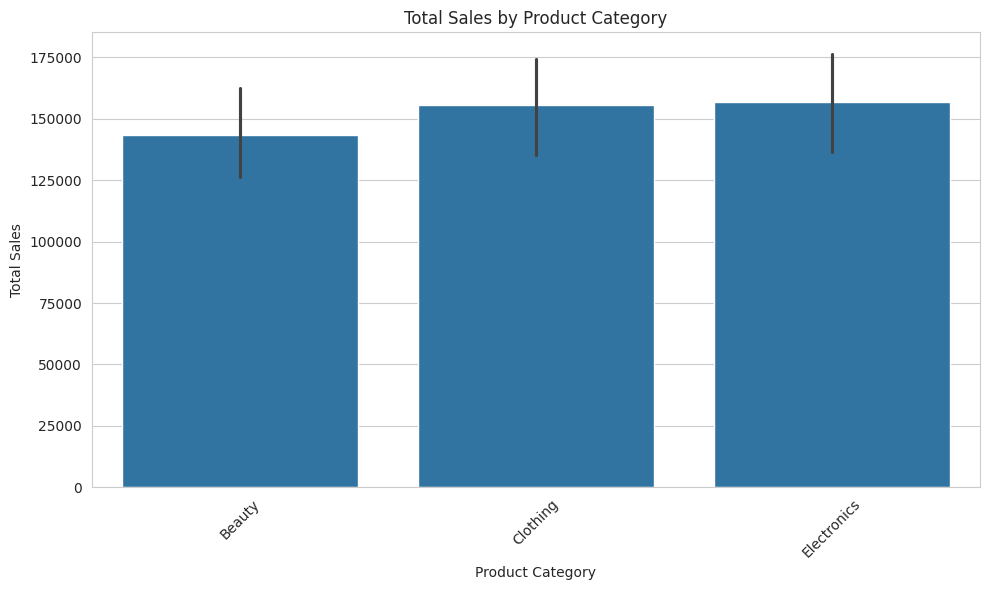

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()



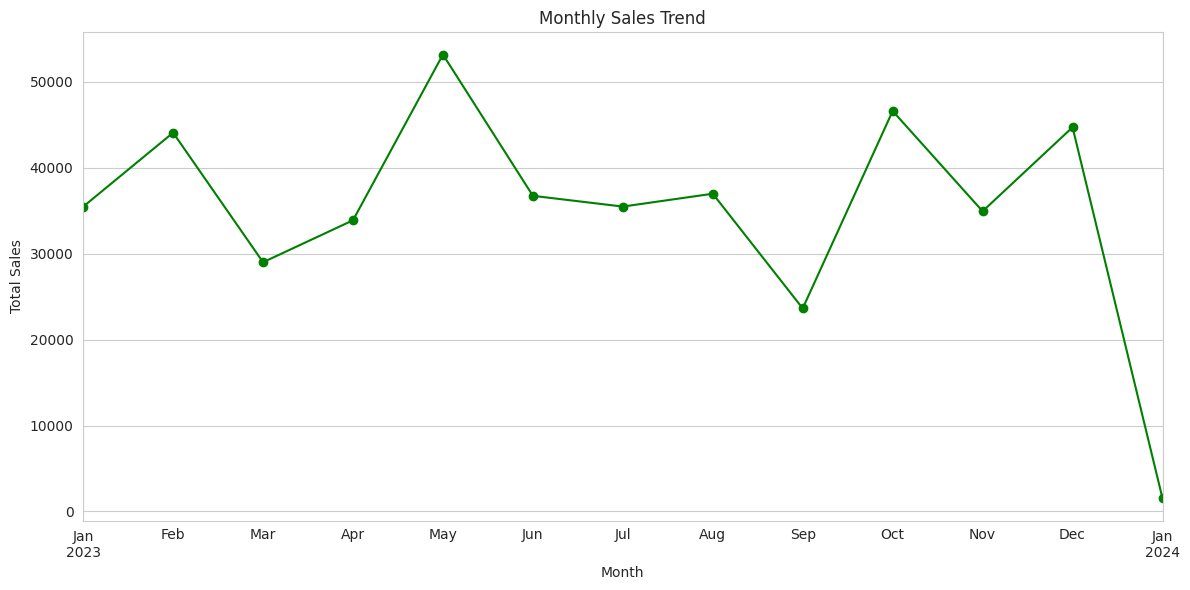

In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # In case it's not already
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


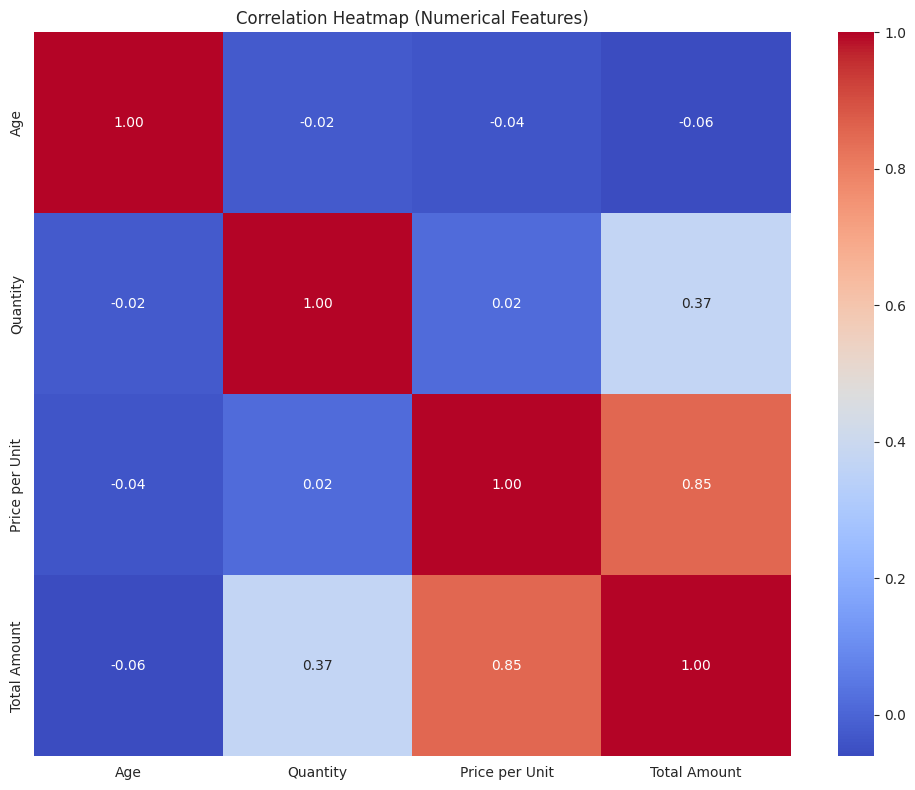

In [18]:
numeric_df = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()
